# Machine Learning Homework 2 (deadline: October 8th, 10:15)
## Regression, regularization and cross-validation

In this homework you will experiment with linear regression and see what happens when we use regularized versions of it. More precisely, you will try out Ridge and Lasso regularization. In addition, we will see how using cross-validation helps us to get more stable estimates for our performance.

Read in the data in **data.csv** and split it into training (50%) and testing (50%) set. Use random seed 0 (train_test_split method).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [2]:
data = pd.read_csv("data.csv", index_col = 0)
## YOUR CODE
x_train, x_test, y_train, y_test = train_test_split(data.drop(columns = "y"), data.y, test_size = 0.5, random_state = 0)
data.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x90,x91,x92,x93,x94,x95,x96,x97,x98,y
0,0.080349,0.639349,0.390906,-0.580971,-0.620030,-0.236409,-0.763078,0.427492,0.967570,0.015933,...,-0.139344,-0.291604,0.266342,-0.049433,-0.160509,-0.424423,-0.265763,-0.087113,0.239603,0.015612
1,-0.116856,-0.498531,-0.684169,0.077253,0.098062,0.386376,0.291100,-0.567685,-0.989671,-0.335158,...,0.059927,-0.436386,-0.184519,0.532634,-0.351102,0.586002,-0.418230,-0.949063,-0.905788,-10.986965
2,0.039961,-0.272807,0.012267,0.480218,-0.940289,-0.401513,0.009838,0.377938,-0.590478,0.873809,...,-0.464189,-0.308448,-0.838500,0.063881,-0.466918,0.103312,-0.889489,0.248117,0.403139,-6.040779
3,0.771496,-0.796448,0.984355,0.610398,-0.990062,-0.753239,-0.220492,-0.617558,-0.061858,0.175305,...,0.798310,-0.270656,0.335484,0.542347,-0.609419,0.008610,-0.822110,0.347330,0.859579,-0.118373
4,0.361182,0.683095,0.144422,-0.212102,0.809841,-0.385002,0.814130,-0.092675,0.254998,-0.642654,...,-0.951702,0.847505,-0.257791,-0.096182,0.842007,-0.563902,-0.177977,0.776424,0.177626,15.604059


## Task 1. Multivariate linear regression (1 point)

#### <font color='purple'>(a) Implement the fitting procedure of non-regularized multivariate ordinary least squares linear regression, as presented in the lecture slides (matrix operations). Fit on the training data and save the coefficients and the intercept for use in subtask (1c). Print out the coefficients corresponding to the five first features.

In [3]:
## YOUR CODE
x_train_temp = x_train.assign(hom = 1)
print(x_train_temp.columns)
a = np.linalg.inv(x_train_temp.transpose().dot(x_train_temp)).dot(x_train_temp.transpose().dot(y_train))
intercept, coeff = a[-1], a[:-1]
print('Coefficients of five first features according to my implementation:', a[:5])

Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30',
       'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40',
       'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50',
       'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60',
       'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70',
       'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80',
       'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90',
       'x91', 'x92', 'x93', 'x94', 'x95', 'x96', 'x97', 'x98', 'hom'],
      dtype='object')
Coefficients of five first features according to my implementation: [11.85875833  7.7562925   9.63087962  6.99932448  4.99498325]


#### <font color='purple'>(b) Call out the `sklearn.linear_model.LinearRegression` learning algorithm from the sklearn package. Fit the model on the training data and save it for use in the following subtasks. Print out the coefficients corresponding to the five first features.

In [4]:
## YOUR CODE
reg = LinearRegression().fit(x_train, y_train)
print('Coefficients of five first features according to sklearn:', reg.coef_[0:5])

Coefficients of five first features according to sklearn: [11.85875833  7.7562925   9.63087962  6.99932448  4.99498325]


#### <font color='purple'>(c) Demonstrate that the methods of subtasks (1a) and (1b) give the same results by showing that they find the same coefficients (don't forget the intercept). </font>

You maybe won't get exactly the same results because of precision problems of floats so feel free to compare if the values are equal up to some precision (e.g. check if difference is less than 0.0000001 etc). You can use code similar to what has been given below, but you might need to change some things depending on where the intercept is in your implementation.

In [5]:
assert(abs(intercept - reg.intercept_) < 0.000001)
for i in range(99):
    assert(abs(coeff[i] - reg.coef_[i]) < 0.000001)

#### <font color='purple'>(d) Using the sklearn model from subtask (1b) predict the results on the training and testing set and calculate and show the root mean square errors (RMSE). Since you need to do the same evaluation in future tasks also, please implement a function 'evaluate' for this.

In [6]:
def evaluate(regression_model_class_instance, trainX, trainY, testX, testY):
    print("\n#################\n")
    print(regression_model_class_instance, '\n')
    
    ## YOUR CODE
    train_pred = regression_model_class_instance.predict(trainX)
    test_pred = regression_model_class_instance.predict(testX)
    
    train_err = (train_pred - trainY)**2
    test_err = (test_pred - testY)**2
    
    rmse_tr = np.sqrt(train_err.mean())
    rmse_te = np.sqrt(test_err.mean())
    
    print("RMSE train:", rmse_tr)
    print("RMSE test:", rmse_te)
    
    return rmse_tr, rmse_te

evaluate(reg, x_train, y_train, x_test, y_test)


#################

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False) 

RMSE train: 2.4079986881087403e-14
RMSE test: 7.715131133027678


(2.4079986881087403e-14, 7.715131133027678)

## Task 2. Ridge & Lambda regularized regression  (1 point)

This blogpost might clarify regularization a bit: https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c

#### <font color='purple'>(a) Implement the fitting procedure of ridge regression, as presented in the lecture slides (matrix operations). Fit on the training data with regularization parameter equal to 1 and save the coefficients and the intercept for use in subtask (2c). Print out the coefficients corresponding to the five first features.

In [7]:
## YOUR CODE
lam = 1
ridge = np.linalg.inv(x_train_temp.transpose().dot(x_train_temp) + lam * np.identity(len(x_train_temp))).dot(x_train_temp.transpose().dot(y_train))
intercept_rd, coeff_rd = ridge[-1], ridge[:-1]
print('Coefficients of five first features according to my implementation:', coeff_rd[:5])

Coefficients of five first features according to my implementation: [7.91026896 7.37023604 6.97156822 6.03240044 4.42825097]


#### <font color='purple'>(b) Call out the `sklearn.linear_model.Ridge` learning algorithm from the sklearn package. Fit the model on the training data with regularization parameter equal to 1 and save it for use in the following subtasks. Print out the coefficients corresponding to the five first features.</font>

Use parameters `solver = "cholesky", tol = 0.000000000001` in order to get more similar results to your own implementation. The default parameter for the regularization is already 1 so no need to specify that. The parameters `solver` and `tol` are necessary to force sklearn to use closed-form solution. Otherwise it would use numerical optimization which would give more different results from yours. **In the future tasks, please use the default option and don't force it to use the closed-form solution (numerical will be faster!).**

In [8]:
## YOUR CODE
rdg = Ridge(solver = "cholesky", tol = 0.000000000001).fit(x_train, y_train)
print('Coefficients of five first features according to my implementation:', rdg.coef_[:5])

Coefficients of five first features according to my implementation: [7.9028966  7.36974365 6.97110025 6.02447226 4.4245448 ]


#### <font color='purple'>(c) Demonstrate the correctess of your implementation the same way as in the previous exercise. For this compare your coefficients and intercept as obtained in subtask (2a) with the coeffiecients and intercept from sklearn, as obtained in subtask (2b). The results can actually vary quite a bit due to implementation differences in matrix operations. Compare that the differences in results (coefficients and intercept) are less than 0.02.

In [9]:
## YOUR CODE
assert(abs(intercept_rd - rdg.intercept_) < 0.02)
for i in range(99):
    assert(abs(coeff_rd[i] - rdg.coef_[i]) < 0.02)

#### <font color='purple'>(d) Train a Lasso model using the sklearn package (use the default regularization parameter) and save it for future use. Print out the coefficients corresponding to the five first features.</font>

In [10]:
## YOUR CODE
lss = Lasso().fit(x_train, y_train)
print('Coefficients of five first features according to my implementation:', lss.coef_[:5])

Coefficients of five first features according to my implementation: [6.94577472 5.59046803 5.11228019 3.00075122 2.42991249]


#### <font color='purple'>(e) Evaluate the sklearn Ridge and Lasso models on the training and testing set and calculate and show the RMSE, using the function 'evaluate' from subtask (1d).

In [11]:
## YOUR CODE
evaluate(rdg, x_train, y_train, x_test, y_test)
evaluate(lss, x_train, y_train, x_test, y_test)


#################

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=1e-12) 

RMSE train: 0.5159376269540156
RMSE test: 4.446220364755503

#################

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False) 

RMSE train: 4.984130516628728
RMSE test: 5.400343154987264


(4.984130516628728, 5.400343154987264)

## Task 3. Choosing a suitable regularization parameter  (1 point)

Since different parameters can lead to very different results we need to do some parameter tuning and find a suitable regularization parameter for both Ridge and Lasso. We could try out different values and see which ones lead to the best results on the test set. However, then we would overfit to our test data and we would not have an adequate estimate of how good the model is in the end. That is why we need to do parameter tuning only using the training set.

Use **alphas = np.linspace(0.01, 10, 100)** for Ridge and **alphas = np.linspace(0.01, 5, 100)** for Lasso. The method generates 100 values with equal steps between the first and second parameter.

#### <font color='purple'>(a) **Method 1:** Divide the training set into training and validation set using 90%/10% split and a random seed 0 (train_test_split method). Train Ridge and Lasso models with different alpha values on the training set and calculate the RMSE values on the validation set. Choose and report the alpha that has the best RMSE for Ridge and another alpha that has best RMSE for Lasso (save both alpha and RMSE values).

In [12]:
def evaluate2(regression_model_class_instance, trainX, trainY, testX, testY):
    #print("\n#################\n")
    #print(regression_model_class_instance, '\n')
    
    ## YOUR CODE
    train_pred = regression_model_class_instance.predict(trainX)
    test_pred = regression_model_class_instance.predict(testX)
    
    train_err = (train_pred - trainY)**2
    test_err = (test_pred - testY)**2
    
    rmse_tr = np.sqrt(train_err.mean())
    rmse_te = np.sqrt(test_err.mean())
    
    #print("RMSE train:", rmse_tr)
    #print("RMSE test:", rmse_te)
    
    return rmse_tr, rmse_te

In [13]:
def method_1(model,data,alphas,random_seed = 0):
    ## YOUR CODE
    xtrain, xtest, ytrain, ytest = train_test_split(data.drop(columns = "y"), data.y, test_size = 0.1, random_state = random_seed)
    best_alpha, rmse = 0, 9999
    for alph in alphas:
        mod = model.set_params(alpha = alph).fit(xtrain, ytrain)
        res = evaluate2(mod, xtrain, ytrain, xtest, ytest)
        if (res[1] < rmse):
            best_alpha, rmse = alph, res[1]
    return best_alpha,rmse

method_1(Ridge(), data, np.linspace(0.01, 10, 100)) ## ridge
method_1(Lasso(), data, np.linspace(0.01, 5, 100)) ## lasso

(0.01, 0.7491922102868802)

#### <font color='purple'>(b) **Method 2:** Instead of doing only one training/validation split, use 10-fold cross validation. For each alpha value calculate the validation errors for each of the folds and average the results. Then choose and report the alpha that has the best RMSE for Ridge and another alpha that has best RMSE for Lasso (save both alpha and RMSE values). For doing the 10-fold split use the sklearn method KFold (kf = KFold(n_splits=10, random_state = 0, shuffle = True)). To see more about how to iterate through the folds see the documentation for the method.

In [14]:
from sklearn.model_selection import KFold

def method_2(model,data,alphas,random_seed = 0):
    ## YOUR CODE
    best_alpha, rmse = 0, 9999
    kf = KFold(n_splits=10, random_state = random_seed, shuffle = True)
    for alph in alphas:
        k = []
        for train_index, test_index in kf.split(data.drop(columns="y")):
            xtrain, xtest = data.drop(columns="y").iloc[train_index], data.drop(columns="y").iloc[test_index]
            ytrain, ytest = data.y[train_index], data.y[test_index]
            mod = model.set_params(alpha = alph).fit(xtrain, ytrain)
            res = evaluate2(mod, xtrain, ytrain, xtest, ytest)
            k.append(res[1])
        
        cr = sum(k)/len(k)
        if (cr < rmse):
            best_alpha, rmse = alph, cr
    return best_alpha,rmse

method_2(Ridge(), data, np.linspace(0.01, 10, 100)) ## ridge
method_2(Lasso(), data, np.linspace(0.01, 5, 100)) ## lasso

(0.01, 0.6933687187795554)

## Task 4. Comparing the stability of Method 1 and Method 2  (1 point)

#### <font color='purple'>(a) Run Method 1 and Method 2 both 10 times, every time using a different value 0,1,2,...,9 as the random_state. Report the best alpha and RMSE for both parameter tuning methods and for both regularization methods for each of the 10 trials.

In [15]:
## YOUR CODE (can split into multiple cells)
name, alph, rmse, methodnr = [], [], [], []
for i in range(10):
    rm1 = method_1(Ridge(), data, np.linspace(0.01, 10, 100), i)
    rm2 = method_2(Ridge(), data, np.linspace(0.01, 10, 100), i)
    lm1 = method_1(Lasso(), data, np.linspace(0.01, 5, 100), i)
    lm2 = method_2(Lasso(), data, np.linspace(0.01, 5, 100), i)
    
    name.append("Ridge"), alph.append(rm1[0]), rmse.append(rm1[1]), methodnr.append(1)
    name.append("Ridge"), alph.append(rm2[0]), rmse.append(rm2[1]), methodnr.append(2)
    name.append("Lasso"), alph.append(lm1[0]), rmse.append(lm1[1]), methodnr.append(1)
    name.append("Lasso"), alph.append(lm2[0]), rmse.append(lm2[1]), methodnr.append(2)
    
results = pd.DataFrame({"Method name": name, "Best alpha": alph, "RMSE": rmse, "Method number": methodnr})

In [16]:
results.sort_values(by = ["Method number", "Method name"])

,Method name,Best alpha,RMSE,Method number
2,Lasso,0.010000,0.749192,1
6,Lasso,0.010000,0.552962,1
10,Lasso,0.060404,0.650384,1
14,Lasso,0.010000,0.688056,1
18,Lasso,0.010000,0.682129,1
22,Lasso,0.060404,0.574299,1
26,Lasso,0.010000,0.692406,1
30,Lasso,0.060404,0.711342,1
34,Lasso,0.010000,0.592106,1
38,Lasso,0.060404,0.614405,1


#### <font color='purple'>(b) What can you say about the stability of the methods? Which one gives more stable information about which alpha to use? Which alpha values turn out to be best in the end for these data?

**Answer:** We can see that the second method gives a more stable alpha with different random states. The first method varies very much for the Ridge method, from giving the minimal alpha value to giving the maximum possible value. For Lasso, the best alpha varies less. With the second method we can see that the Lasso has much less unique values and varies less. For the Ridge method we also have less variance, but a higher RMSE. I would say that the alpha values given by the second method are better, so $0.11$ for Ridge and $0.01$ for Lasso.

#### <font color='purple'>(c) Create two plots (one for Ridge and one for Lasso) where on each plot there are two boxplots - one for showing the distribution of the RMSE values for the 10 trials for Method 1 and the other for Method 2.

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'svg'
plt.style.use("ggplot") 

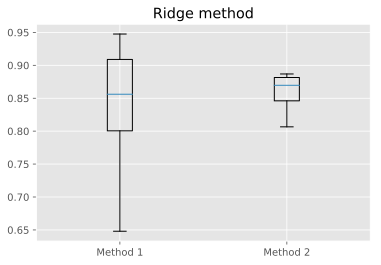

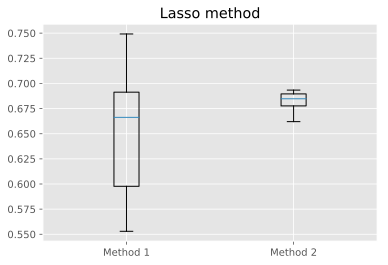

In [18]:
## YOUR CODE
plt.figure()
ridge = [list(results.loc[(results.loc[:,"Method name"] == "Ridge") & (results.loc[:,"Method number"] == 1), "RMSE"]),
        list(results.loc[(results.loc[:,"Method name"] == "Ridge") & (results.loc[:,"Method number"] == 2), "RMSE"])]
plt.boxplot(ridge)
plt.title("Ridge method")
plt.xticks([1, 2], ["Method 1", "Method 2"])

plt.figure()
lasso = [list(results.loc[(results.loc[:,"Method name"] == "Lasso") & (results.loc[:,"Method number"] == 1), "RMSE"]),
        list(results.loc[(results.loc[:,"Method name"] == "Lasso") & (results.loc[:,"Method number"] == 2), "RMSE"])]
plt.boxplot(lasso)
plt.title("Lasso method")
plt.xticks([1, 2], ["Method 1", "Method 2"])
print("")

#### <font color='purple'>(d) Comment on why the results look like they do? In general, when tuning parameters, is it better to use one training-validation split or K-fold cross-validation? Why?

**Answer:** As we can see, the first method (one training-validation split) has a higher variance in RMSE, while K-fold gives us a more stable RMSE every time. The first method might give a lower RMSE, but for stability it would be better to use K-fold CV.

## Task 5. Regularization parameter effect on the coefficients  (1 point)

#### <font color='purple'>(a) The regularization parameter influences the values of the coefficients. Create two plots (one for Ridge and one for Lasso) that have the regularization parameter on the x-axis and coefficient values on the y-axis. You don't have to take all 99 values, you can take for example the first 20. Show each coefficient as a line (on the same plot) and comment on what happens when the regularization parameter increases. </font>

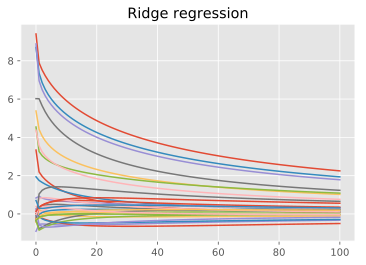

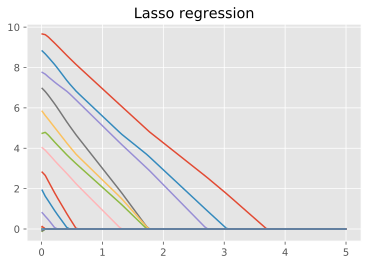

In [19]:
## YOUR CODE
plt.figure()
Rx, Ry = [], []
for i in2:
    R = Ridge(alpha = i).fit(x_train, y_train)
    Rx.append(i), Ry.append(R.coef_[0:30])
    #print(R.coef_[0:20])
#plt.plot([0, 1, 2], [[1,2], [3,1], [5,2]])
plt.plot(Rx, Ry)
plt.title("Ridge regression")

plt.figure()
Lx, Ly = [], []
for i in np.linspace(0.01, 5, 100):
    L = Lasso(alpha = i).fit(x_train, y_train)
    Lx.append(i), Ly.append(L.coef_[0:30])
    #print(R.coef_[0:20])
#plt.plot([0, 1, 2], [[1,2], [3,1], [5,2]])
plt.plot(Lx, Ly)
plt.title("Lasso regression")
print("")

#### <font color='purple'>(b) What does Ridge regression do and what does Lasso regression do? How do they differ? </font>

**Answer:** We can see that for the Ridge regression, the coefficients start to converge when the alpha starts getting close to $\infty$, possibly to $0$. For the Lasso regression we can see that all the coefficients gain a value of 0. This is because Lasso regression does not require for it to have non-zero coefficients.

## Task 6. Evaluating different models  (1 point)

#### <font color='purple'>(a) Choose the values of alpha for Ridge and Lasso according to subtask (4b). Now let's see which model works best for our data by evaluating the test RMSE. Compare the following models by reporting the training and testing set RMSE: </font>

1. Non-regularized linear regression
2. Ridge regression with your chosen parameter
3. Lasso regression with your chosen parameter
4. A "dumb" model that always predicts the mean value of y_train
5. An ideal model that the instructors have used for generating the data (the true coefficients are [10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 0, ..., 0] and intercept 0).

In [178]:
## YOUR CODE
first = LinearRegression().fit(x_train, y_train)
second = Ridge(alpha = 0.11).fit(x_train, y_train)
third = Lasso(alpha = 0.01).fit(x_train, y_train)

fourth = LinearRegression().fit(x_train, y_train)
fourth.intercept_, fourth.coef_ = np.asarray(sum(y_train)/len(y_train)), np.asarray([0 for i in range(len(fourth.coef_))])

fifth = LinearRegression().fit(x_train, y_train)
fifth.intercept_, fifth.coef_ = np.asarray(0), np.asarray([i for i in range(10, 0, -1)] + [0 for i in range(len(fifth.coef_) - 10)]
)
FE = evaluate2(first, x_train, y_train, x_test, y_test)
SE = evaluate2(second, x_train, y_train, x_test, y_test)
TE = evaluate2(third, x_train, y_train, x_test, y_test)
FOE = evaluate2(fourth, x_train, y_train, x_test, y_test)
FIE = evaluate2(fifth, x_train, y_train, x_test, y_test)

models = [FE, SE, TE, FOE, FIE]

for i in range(5):
    print("The {:d}. model has a train RMSE of {:.6f} and a test RMSE of {:.6f}".format(i+1, models[i][0], models[i][1]))

The 1. model has a train RMSE of 0.000000 and a test RMSE of 7.715131
The 2. model has a train RMSE of 0.148471 and a test RMSE of 3.029505
The 3. model has a train RMSE of 0.286654 and a test RMSE of 0.835042
The 4. model has a train RMSE of 11.047120 and a test RMSE of 11.321863
The 5. model has a train RMSE of 0.574942 and a test RMSE of 0.600618


In [179]:
print(fifth.coef_ - third.coef_)

[ 0.33903815  0.17896447  0.24100504  0.03395696  0.16816897  0.26072155
 -0.03060079  0.18393539  0.0801194   0.19165617 -0.04932931  0.
  0.11320501  0.         -0.08879478  0.05168706  0.          0.09465297
  0.          0.         -0.06107495  0.          0.          0.
  0.00241327 -0.05536175  0.          0.         -0.12295207  0.
 -0.10870054  0.          0.13648857 -0.13306653  0.04915616  0.08340665
  0.06716967  0.          0.          0.         -0.32192897  0.
  0.          0.00797126 -0.06582173 -0.06075424 -0.24892203  0.07958716
  0.          0.         -0.02838334 -0.11318232  0.01884909 -0.18447904
  0.14383274 -0.11703269 -0.0959443  -0.24742753  0.00354758  0.
 -0.04209882  0.01547699  0.         -0.0627201  -0.13091575  0.
  0.          0.15359898  0.05394289 -0.09176922 -0.01682801 -0.21065121
 -0.14670707  0.          0.         -0.02833906  0.11729837 -0.14500535
 -0.00507008  0.          0.          0.          0.01463556  0.
  0.          0.         -0.119159

#### <font color='purple'>(b) Which method gives the best results and by looking at which value do you claim that? Why did this method work the best in your opinion?

**Answer:** Since we want the model to work on real data, then we should look at the test RMSE. We can see that the lowest RMSE is on the ideal model, which is logical, since the data was generated based on this method.

#### <font color='purple'>(c) Were all of the "smart" models better than the "dumb" one. What would it mean if the learned model would give worse results?

**Answer:** Yes, all of them were better. It would mean that the model has overfitted and does not give adequate results on real data.

#### <font color='purple'>(d) Were the learned models far from the ideal one? Were the learned coefficients similar to the true ones?

**Answer:** Not all of them. The closest one was Lasso and Ridge was not far behind. The learned coefficients were close, but not the same in all the cases. Most were off by $0.1$.

#### <font color='purple'>(e) Which model overfitted the most, how can you see that?

**Answer:** We can see that the non-regularized model has overfitted the most, since it has a very low RMSE on the train data, but a huge RMSE on the test data.

#### <font color='purple'>(f) Are regularized methods always better than methods without regularization (not only in this case but in general). Why/why not?

**Answer:** They are better, since they avoid trying to overfit, which means that the model has a higher chance of working on real data as well.

## Optional Bonus Task 7. Dual perceptron (Bonus, 1 point)

#### <font color='purple'> Implement the dual perceptron algorithm. </font>

<img src="dual_perceptron.png" alt="Dual perceptron" style="width: 500px;"/>

**Note:** check `pandas` [manual about indexing data](https://pandas.pydata.org/pandas-docs/stable/indexing.html) and [iterrows documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iterrows.html), it could be useful

In [180]:
x1 = np.array([5, 6, 7, 7, 8, 9, 0, 1, 2, 4, 5, 6])
x2 = np.array([2, 1, 3, 5, 10, 3, 4, 8, 6, 10, 9, 11])
y = np.array([1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1])

data = pd.DataFrame({'x1': x1, 'x2': x2, 'y':y})
data['x0'] = np.ones_like(data['x1']) # Don't forget to create homogeneous coordinates!
data = data[['x0', 'x1', 'x2', 'y']]
data.head()

,x0,x1,x2,y
0,1,5,2,1
1,1,6,1,1
2,1,7,3,1
3,1,7,5,1
4,1,8,10,1


In [181]:
def dual_perceptron(data):
    # Your code goes here
    alpha = np.zeros_like(data.x0)
    w = np.zeros(3)
    converged = False
    while (converged == False):
        converged = True
        for i in range(len(data)):
            req = 0
            for j in range(len(data)):
                req += alpha[j] * data.loc[j, "y"] * data.loc[i, ["x0", "x1", "x2"]].dot(data.loc[j, ["x0", "x1", "x2"]])
            req = req * data.loc[i, "y"]
            if (req <= 0):
                alpha[i] += 1
                converged = False
            
    for i in range(len(data)):
        w += alpha[i] * data.loc[i, "y"] * data.loc[i, ["x0", "x1", "x2"]]
    return w

Test your solution:

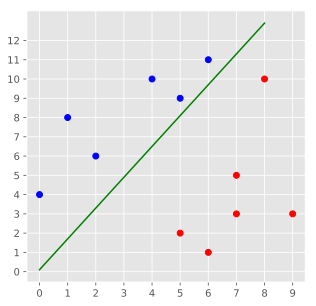

In [182]:
w = dual_perceptron(data)
xs= np.linspace(0,8,100)
ys = (-1) * (w[1] / w[2]) * xs - w[0] / w[2]

fig = plt.figure(figsize=(5,5))
plt.plot(x1[y<0], x2[y<0], 'bo')
plt.plot(x1[y>0], x2[y>0], 'ro')
plt.yticks(np.arange(13))
plt.xticks(np.arange(13))
plt.plot(xs, ys, color = "green")

plt.show()